## Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:
* a.	Loading and preprocessing the image data
* b.	Defining the model's architecture
* c.	Training the model
* d.	Estimating the model's performance

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import SGD

In [8]:
train=pd.read_csv('mnist_train.csv')
test=pd.read_csv("mnist_test.csv")

In [11]:
x_train=train.drop(['label'],axis=1).values
y_train=train['label'].values

In [12]:
x_test=test.drop(['label'],axis=1).values

In [13]:
y_test=test['label'].values

In [15]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [16]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

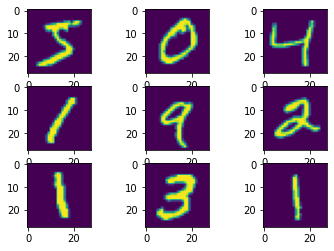

In [17]:
 for i in range (9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

In [23]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

sgd=SGD(learning_rate=0.1)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_12 (Ba  (None, 13, 13, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                      

In [24]:
m_name=model.fit(x_train,y_train,batch_size=64,epochs=11,validation_split=0.2)

Epoch 1/11


750/750 [==============================] - 13s 14ms/step - loss: 0.1575 - accuracy: 0.9536 - val_loss: 0.0645 - val_accuracy: 0.9804
Epoch 2/11
750/750 [==============================] - 11s 14ms/step - loss: 0.0669 - accuracy: 0.9800 - val_loss: 0.0549 - val_accuracy: 0.9824
Epoch 3/11
750/750 [==============================] - 12s 16ms/step - loss: 0.0501 - accuracy: 0.9851 - val_loss: 0.0566 - val_accuracy: 0.9818
Epoch 4/11
750/750 [==============================] - 12s 16ms/step - loss: 0.0371 - accuracy: 0.9884 - val_loss: 0.0540 - val_accuracy: 0.9837
Epoch 5/11
750/750 [==============================] - 13s 17ms/step - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.0393 - val_accuracy: 0.9884
Epoch 6/11
750/750 [==============================] - 13s 17ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0434 - val_accuracy: 0.9885
Epoch 7/11
750/750 [==============================] - 12s 16ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.0480 - val_accurac

In [25]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


4


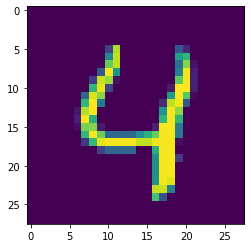

In [26]:
plt.imshow(x_test[4])
print(pred.argmax(axis=1)[4])

In [27]:
m_name.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9889


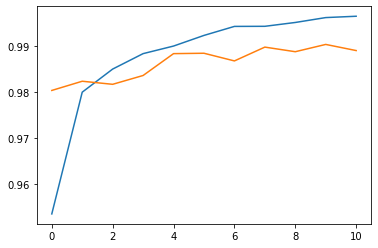

In [30]:
plt.plot(m_name.history['accuracy'])
plt.plot(m_name.history['val_accuracy'])

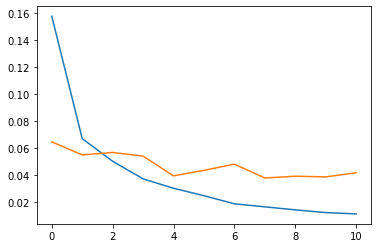

In [31]:
plt.plot(m_name.history['loss'])
plt.plot(m_name.history['val_loss'])